In [1]:
# Set path for ASE and other DFT stuff
 
from ase.build import bulk
from ase.calculators.emt import EMT
from ase.dft.kpoints import ibz_points, bandpath
from ase.phonons import Phonons
import numpy as np
 
 
# Setup crystal and EMT calculator
atoms = bulk('Al', 'fcc', a=4.05)
calc = EMT()
 
 
# Phonon calculator
N = 7
ph = Phonons(atoms, calc, supercell=(N, N, N), delta=0.05)
ph.run()
 
## Read forces and assemble the dynamical matrix
ph.read(acoustic=True)
 
# High-symmetry points in the Brillouin zone
points = ibz_points['fcc']
G = points['Gamma']
X = points['X']
W = points['W']
K = points['K']
L = points['L']
U = points['U']
 
point_names = ['$\Gamma$', 'X', 'U', 'L', '$\Gamma$', 'K']
path = [G, X, U, L, G, K]
 
 
# Band structure in meV
path = bandpath(path, atoms.cell, 100)
path_kc = path.kpts
q, Q, labels = path.get_linear_kpoint_axis()
omega_kn = 1000 * ph.band_structure(path_kc)
 
 
## ASE DONE
# NBVAL_IGNORE_OUTPUT

WARNING, 3 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.035e-08*i)
WARNING, 3 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 1.035e-08*i)


In [2]:
## NOW TO MANTID
from mantid.simpleapi import *
# NBVAL_IGNORE_OUTPUT

FrameworkManager-[Notice] Welcome to Mantid 6.8.0
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid6.8
DownloadInstrument-[Notice] All instrument definitions up to date


In [3]:
 # Make MantidWorkspace
new_ws1 = CreateWorkspace(DataX=q, DataY=omega_kn[:,0], DataE=omega_kn[:,1], NSpec=1,UnitX='Label')
new_ws2 = CreateWorkspace(DataX=q, DataY=omega_kn[:,1], DataE=omega_kn[:,1], NSpec=1,UnitX='Label')
new_ws3 = CreateWorkspace(DataX=q, DataY=omega_kn[:,2], DataE=omega_kn[:,1], NSpec=1,UnitX='Label')
# DataE - Data Error artificail set
# NBVAL_IGNORE_OUTPUT

CreateWorkspace-[Notice] CreateWorkspace started
CreateWorkspace-[Notice] CreateWorkspace successful, Duration 0.00 seconds
CreateWorkspace-[Notice] CreateWorkspace started
CreateWorkspace-[Notice] CreateWorkspace successful, Duration 0.00 seconds
CreateWorkspace-[Notice] CreateWorkspace started
CreateWorkspace-[Notice] CreateWorkspace successful, Duration 0.00 seconds


Text(0.5, 1.0, 'ASE: phonon dispersion for bulk aluminum ')

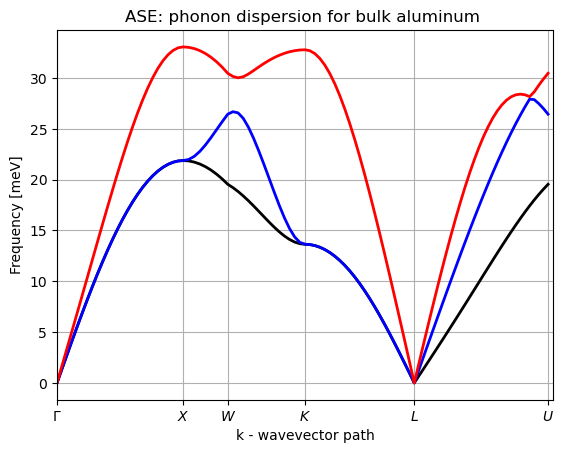

In [4]:
# Use matplotlib to make nice plots
# Plot ASE python array with matplotlib  method
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(q, omega_kn[:,0], 'k-', lw=2)
plt.plot(q, omega_kn[:,1], '-', lw=2, color='blue')
plt.plot(q, omega_kn[:,2], '-', lw=2, color='red')
X =[ 0,          1.55140378,  2.09990785,  3.04994476,  4.39349984,  6.03901204]
plt.xticks(X, ['$%s$' % n for n in [r'\Gamma', 'X', 'W', 'K', 'L', 'U']])
plt.xlim([0,6.1])
plt.xlabel('k - wavevector path')
plt.ylabel('Frequency [meV]')
plt.grid(True)
plt.title("ASE: phonon dispersion for bulk aluminum ")

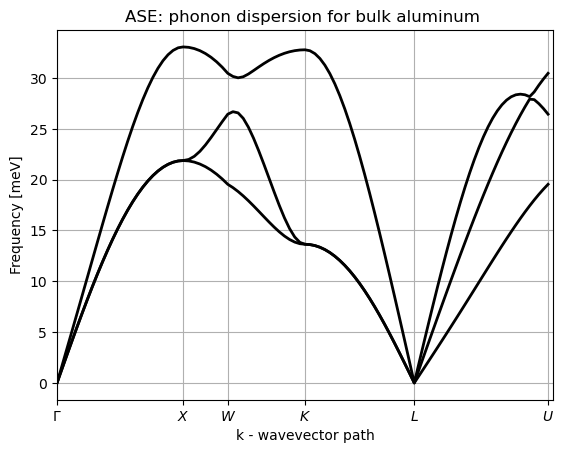

In [5]:
# Use matplotlib to make nice plots
# Plot Manitd ASE workspace with matplotlib  method
plt.figure(2)
plt.plot(new_ws1.readX(0), new_ws1.readY(0), 'k-', lw=2)
plt.plot(new_ws2.readX(0), new_ws2.readY(0), 'k-', lw=2)
plt.plot(new_ws3.readX(0), new_ws3.readY(0), 'k-', lw=2)
X =[ 0.,          1.55140378,  2.09990785,  3.04994476,  4.39349984,  6.03901204]
plt.xticks(X, ['$%s$' % n for n in [r'\Gamma', 'X', 'W', 'K', 'L', 'U']])
plt.xlim([0,6.1])
plt.xlabel('k - wavevector path')
plt.ylabel('Frequency [meV]')
plt.grid(True)
plt.title("ASE: phonon dispersion for bulk aluminum ")
plt.show()